Draws the cummulative MI graph for old and new concept extraction

In [110]:
import pandas as pd
import benepar
from matplotlib import pyplot as plt

from concept_processing.codex_pipeline import CodexPipeline, extract_concepts

benepar.download('benepar_en3')

[nltk_data] Downloading package benepar_en3 to
[nltk_data]     /Users/Cherry0904/nltk_data...
[nltk_data]   Package benepar_en3 is already up-to-date!


True

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np

from concept_processing.legacy_code import capture_all_concepts_full_old
from concept_processing.pam import calc_cummulative_mi


In [3]:
%set_env TOKENIZERS_PARALLELISM false

env: TOKENIZERS_PARALLELISM=false


# Old concept extraction
Output data: old_pam, old_labels_as_indices

In [122]:
datapath = "/Users/Cherry0904/Desktop/3_cols_data/data_for_mi_graph"
concept_maxK = 200 # 50

In [11]:
initial_state_old = capture_all_concepts_full_old(datapath)

artemis_3_cols_1000.csv, 

/Users/Cherry0904/Desktop/roko-for-charlize/venv/lib/python3.8/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


data.shape = (1000, 1092)
We have 1000 datapoints with 1092 independent concepts.
rows_to_remove = []
concepts_to_remove = []
Before removing none label
pam.shape = (1000, 1092)
len(concepts) = 1092
ids.shape = (1000,)
labels_as_indices.shape = (1000,)
categories = ['amusement' 'anger' 'awe' 'contentment' 'disgust' 'excitement' 'fear'
 'sadness' 'something else']
After removing none label
pam.shape = (1000, 1092)
len(concepts) = 1092
ids.shape = (1000,)
labels_as_indices.shape = (1000,)
categories = ['amusement' 'anger' 'awe' 'contentment' 'disgust' 'excitement' 'fear'
 'sadness' 'something else']


In [17]:
# threshold = 0 include all
old_extraction_cummulative_mi, _ = calc_cummulative_mi(initial_state_old.concept_pam,
                                                       label_ids=initial_state_old.label_indices,
                                                       threshold=0, maxK=concept_maxK)
old_extraction_cummulative_mi

.......................................................................................................................................................................................................

array([0.0096688 , 0.01455111, 0.01939405, 0.02414974, 0.02902974,
       0.03405208, 0.03924085, 0.04462995, 0.05027071, 0.05625025,
       0.06275202, 0.06717945, 0.07164054, 0.07560188, 0.07941962,
       0.08305825, 0.08632813, 0.08929675, 0.09228474, 0.09529252,
       0.09832054, 0.10136926, 0.10443916, 0.10753075, 0.11064455,
       0.11378112, 0.11694103, 0.12012489, 0.12333335, 0.12656708,
       0.12982679, 0.13311322, 0.13642718, 0.1397695 , 0.14314107,
       0.14654284, 0.14997581, 0.15344107, 0.15693975, 0.16047309,
       0.16404242, 0.16764915, 0.17129483, 0.17498112, 0.17870984,
       0.18248296, 0.18630264, 0.19017128, 0.1940915 , 0.19806623,
       0.20209875, 0.20619273, 0.21035235, 0.21458238, 0.21888833,
       0.22327663, 0.22775489, 0.23233223, 0.23701983, 0.24183167,
       0.24678577, 0.24920901, 0.2516435 , 0.2540894 , 0.25654687,
       0.25901607, 0.26149716, 0.26399032, 0.26649572, 0.26901353,
       0.27154395, 0.27408715, 0.27664334, 0.27921272, 0.28179

# New concept extraction

In [18]:
initial_state_new = extract_concepts(datapath)

artemis_3_cols_1000.csv, 

/Users/Cherry0904/Desktop/roko-for-charlize/ilasp/atomisation/background.ilasp:4:13-25: info: atom does not occur in any rule head:
  dep(#Anon0,T,#Anon1)

/Users/Cherry0904/Desktop/roko-for-charlize/ilasp/atomisation/background.ilasp:5:13-25: info: atom does not occur in any rule head:
  dep(#Anon0,#Anon1,T)

/Users/Cherry0904/Desktop/roko-for-charlize/ilasp/atomisation/background.ilasp:6:13-25: info: atom does not occur in any rule head:
  dep(L,#Anon0,#Anon1)

/Users/Cherry0904/Desktop/roko-for-charlize/ilasp/atomisation/background.ilasp:12:41-53: info: atom does not occur in any rule head:
  dep(#X0,#X1,#P2)

/Users/Cherry0904/Desktop/roko-for-charlize/ilasp/atomisation/background.ilasp:13:41-53: info: atom does not occur in any rule head:
  dep(#X0,#P1,#X2)

/Users/Cherry0904/Desktop/roko-for-charlize/ilasp/atomisation/background.ilasp:30:18-36: info: atom does not occur in any rule head:
  dep(nsubj,T1,T2)

/Users/Cherry0904/Desktop/roko-for-charlize/ilasp/atomisation/background.

In [19]:
# threshold = 0 include all
new_extraction_cummulative_mi, _ = calc_cummulative_mi(initial_state_new.concept_pam,
                                                       label_ids=initial_state_new.label_indices,
                                                       threshold=0, maxK=concept_maxK)
new_extraction_cummulative_mi

# #%% md
#
# # Simple concept pruning
#
# #%%
#
# pipeline = CodexPipeline(methods=['simple_pruning'], use_old_pipeline=False)
# after_simple_pruning, _ = pipeline(initial_state_new)
#
#
# #%%
#
# # threshold = 0 include all
# simple_prune_cummulative_mi, _ = calc_cummulative_mi(after_simple_pruning.concept_pam,
#                                                      label_ids=after_simple_pruning.label_indices, threshold=0,
#                                                      maxK=concept_maxK)
# simple_prune_cummulative_mi
#

.......................................................................................................................................................................................................

array([0.01138087, 0.02092289, 0.03022813, 0.03900764, 0.04756272,
       0.05613395, 0.06700436, 0.07927768, 0.08950726, 0.0991374 ,
       0.10763252, 0.11586737, 0.12398415, 0.13185769, 0.13960104,
       0.14730557, 0.15437228, 0.16128963, 0.16819044, 0.17490052,
       0.18559355, 0.19222686, 0.19878533, 0.20575035, 0.21204204,
       0.21782517, 0.22357333, 0.22913752, 0.23462405, 0.24002637,
       0.24538705, 0.25108618, 0.25730721, 0.26491319, 0.2701396 ,
       0.27537169, 0.28306718, 0.28896898, 0.29414349, 0.29930838,
       0.30448903, 0.3097396 , 0.31487991, 0.32002254, 0.3251502 ,
       0.33015705, 0.33513568, 0.34032769, 0.34525077, 0.35065827,
       0.35551558, 0.36028293, 0.36505019, 0.36984576, 0.37453411,
       0.37927818, 0.38407991, 0.38874798, 0.39333137, 0.39789621,
       0.40228364, 0.40651952, 0.4107487 , 0.41494374, 0.41906666,
       0.42308699, 0.42696134, 0.4308122 , 0.43462176, 0.43837843,
       0.44210075, 0.44581723, 0.44950079, 0.45321683, 0.45696

# Concept grouping old

In [30]:
pipeline = CodexPipeline(methods=['grouping'], use_old_pipeline=True)
after_grouping_old, _ = pipeline(initial_state_old)

# _, max_k = after_grouping_old.concept_pam.shape
# old_grouping_cummulative_mi, _ = calc_cummulative_mi(after_grouping_old.concept_pam,
#                                                      label_ids=after_grouping_old.label_indices, threshold=0,
#                                                      maxK=max_k)
# plt.figure(figsize=(8, 6))
# prepended_cummulative_mi = np.insert(old_grouping_cummulative_mi, 0, 0)
# k = np.arange(0, max_k + 1)
# plt.plot(k, prepended_cummulative_mi, label="Old concepts extraction with grouping")
#
# plt.xlabel("Number of concepts")
# plt.ylabel("Cummulative MI")
# plt.legend()
#
# plt.savefig('Cummulative MI graphs.png')

In [34]:
# threshold = 0 include all
old_grouping_cummulative_mi, _ = calc_cummulative_mi(after_grouping_old.concept_pam,
                                                     label_ids=after_grouping_old.label_indices, threshold=0,
                                                     maxK=concept_maxK)
old_grouping_cummulative_mi

.......................................................................................................................................................................................................

array([0.02220965, 0.03683006, 0.04640969, 0.05353339, 0.0605042 ,
       0.06735208, 0.0722788 , 0.07716477, 0.08200227, 0.08683834,
       0.09155794, 0.09640182, 0.10138799, 0.10654056, 0.11189343,
       0.11749792, 0.12344114, 0.12990656, 0.13426119, 0.13864931,
       0.14307164, 0.14752893, 0.15191873, 0.15604858, 0.15988824,
       0.16371198, 0.16749697, 0.17111117, 0.17474769, 0.17815534,
       0.18150584, 0.18481227, 0.18809508, 0.19133243, 0.19454496,
       0.19755739, 0.20047879, 0.20341992, 0.20638121, 0.20936314,
       0.21236617, 0.21539081, 0.21843759, 0.22150707, 0.22459982,
       0.22771645, 0.2308576 , 0.23402395, 0.23721621, 0.24043511,
       0.24368147, 0.24695612, 0.25025994, 0.25359388, 0.25695896,
       0.26035624, 0.26378688, 0.2672521 , 0.27075323, 0.2742917 ,
       0.27786903, 0.2814869 , 0.28514712, 0.28885166, 0.2926027 ,
       0.29640261, 0.30025403, 0.30415988, 0.30812344, 0.31214839,
       0.3162389 , 0.32039975, 0.32463644, 0.3289554 , 0.33336

# Concept grouping new

In [35]:
pipeline = CodexPipeline(methods=['grouping'], use_old_pipeline=False)
after_grouping_new, _ = pipeline(initial_state_new)

# _, max_k = after_grouping_new.concept_pam.shape
# after_grouping_new_mi, _ = calc_cummulative_mi(after_grouping_new.concept_pam,
#                                                      label_ids=after_grouping_new.label_indices, threshold=0,
#                                                      maxK=max_k)
# plt.figure(figsize=(8, 6))
# prepended_cummulative_mi = np.insert(after_grouping_new_mi, 0, 0)
# k = np.arange(0, max_k + 1)
# plt.plot(k, prepended_cummulative_mi, label="New concepts extraction with grouping")
#
# plt.xlabel("Number of concepts")
# plt.ylabel("Cummulative MI")
# plt.legend()
#
# plt.savefig('Cummulative MI graphs.png')

In [36]:
# threshold = 0 include all
new_grouping_cummulative_mi, _ = calc_cummulative_mi(after_grouping_new.concept_pam,
                                                     label_ids=after_grouping_new.label_indices, threshold=0,
                                                     maxK=concept_maxK)
new_grouping_cummulative_mi



.......................................................................................................................................................................................................

array([0.01542647, 0.03070598, 0.04178808, 0.05504313, 0.06892276,
       0.08229557, 0.09489962, 0.10593865, 0.11950884, 0.13071427,
       0.14153816, 0.15258112, 0.16307944, 0.17313741, 0.18293084,
       0.19227636, 0.20088249, 0.2094537 , 0.21793297, 0.22664076,
       0.23531043, 0.24478408, 0.25340416, 0.26172384, 0.26961854,
       0.27749897, 0.28505065, 0.29486909, 0.30220074, 0.30945068,
       0.31673093, 0.32396773, 0.3311292 , 0.3380516 , 0.34508069,
       0.35192792, 0.35866158, 0.36530612, 0.37189367, 0.37846007,
       0.38621104, 0.39233956, 0.39840387, 0.40429823, 0.41104753,
       0.41684437, 0.4238502 , 0.42959662, 0.43535566, 0.44138364,
       0.44879628, 0.45448036, 0.46008439, 0.46568498, 0.4712206 ,
       0.47674285, 0.48215942, 0.48736236, 0.49256454, 0.49771766,
       0.50275204, 0.50768148, 0.51255015, 0.51738429, 0.52219286,
       0.52695775, 0.53168887, 0.53624551, 0.54095404, 0.54548388,
       0.54999302, 0.55444829, 0.55885434, 0.56324068, 0.56758

### Display a graph

In [44]:
def add_cummulative_mi_plt(cummulative_mi, label):
    prepended_cummulative_mi = np.insert(cummulative_mi, 0, 0)
    k = np.arange(0, concept_maxK + 1)
    plt.plot(k, prepended_cummulative_mi, label=label)


In [120]:
old_extraction_cummulative_mi = np.array([0.0096688 , 0.01455111, 0.01939405, 0.02414974, 0.02902974,
       0.03405208, 0.03924085, 0.04462995, 0.05027071, 0.05625025,
       0.06275202, 0.06717945, 0.07164054, 0.07560188, 0.07941962,
       0.08305825, 0.08632813, 0.08929675, 0.09228474, 0.09529252,
       0.09832054, 0.10136926, 0.10443916, 0.10753075, 0.11064455,
       0.11378112, 0.11694103, 0.12012489, 0.12333335, 0.12656708,
       0.12982679, 0.13311322, 0.13642718, 0.1397695 , 0.14314107,
       0.14654284, 0.14997581, 0.15344107, 0.15693975, 0.16047309,
       0.16404242, 0.16764915, 0.17129483, 0.17498112, 0.17870984,
       0.18248296, 0.18630264, 0.19017128, 0.1940915 , 0.19806623,
       0.20209875, 0.20619273, 0.21035235, 0.21458238, 0.21888833,
       0.22327663, 0.22775489, 0.23233223, 0.23701983, 0.24183167,
       0.24678577, 0.24920901, 0.2516435 , 0.2540894 , 0.25654687,
       0.25901607, 0.26149716, 0.26399032, 0.26649572, 0.26901353,
       0.27154395, 0.27408715, 0.27664334, 0.27921272, 0.28179548,
       0.28439185, 0.28700204, 0.28962628, 0.29226479, 0.29491782,
       0.29758562, 0.30026843, 0.30296652, 0.30568017, 0.30840966,
       0.31115527, 0.3139173 , 0.31669608, 0.31949192, 0.32230516,
       0.32513614, 0.32798524, 0.33085281, 0.33373927, 0.336645  ,
       0.33957044, 0.34251603, 0.34548223, 0.34846952, 0.35147841,
       0.35450942, 0.3575631 , 0.36064004, 0.36374084, 0.36686615,
       0.37001663, 0.373193  , 0.37639601, 0.37962645, 0.38288516,
       0.38617303, 0.389491  , 0.39284008, 0.39622136, 0.39963597,
       0.40308514, 0.40657021, 0.41009259, 0.41365382, 0.41725557,
       0.42089965, 0.42458804, 0.4283229 , 0.43210662, 0.43594182,
       0.43983144, 0.44377875, 0.44778743, 0.45186165, 0.45600619,
       0.46022655, 0.46452917, 0.46892164, 0.4734131 , 0.47801472,
       0.48274049, 0.48760842, 0.49264261, 0.49494224, 0.49725259,
       0.49957379, 0.501906  , 0.50424937, 0.50660404, 0.50897017,
       0.51134793, 0.51373748, 0.51613899, 0.51855263, 0.52097858,
       0.52341703, 0.52586817, 0.52833218, 0.53080927, 0.53329964,
       0.53580352, 0.5383211 , 0.54085262, 0.54339832, 0.54595842,
       0.54853318, 0.55112284, 0.55372769, 0.55634797, 0.55898398,
       0.56163601, 0.56430436, 0.56698934, 0.56969127, 0.57241048,
       0.57514734, 0.57790219, 0.58067541, 0.5834674 , 0.58627856,
       0.58910931, 0.5919601 , 0.59483138, 0.59772364, 0.60063739,
       0.60357315, 0.60653146, 0.60951292, 0.61251813, 0.61554773,
       0.61860239, 0.62168282, 0.62478977, 0.62792404, 0.63108646,
       0.63427793, 0.63749938, 0.64075183, 0.64403635, 0.64735409,
       0.65070628, 0.65409424, 0.6575194 , 0.66098329, 0.66448758])


old_grouping_cummulative_mi = np.array([0.02220965, 0.03683006, 0.04640969, 0.05353339, 0.0605042 ,
       0.06735208, 0.0722788 , 0.07716477, 0.08200227, 0.08683834,
       0.09155794, 0.09640182, 0.10138799, 0.10654056, 0.11189343,
       0.11749792, 0.12344114, 0.12990656, 0.13426119, 0.13864931,
       0.14307164, 0.14752893, 0.15191873, 0.15604858, 0.15988824,
       0.16371198, 0.16749697, 0.17111117, 0.17474769, 0.17815534,
       0.18150584, 0.18481227, 0.18809508, 0.19133243, 0.19454496,
       0.19755739, 0.20047879, 0.20341992, 0.20638121, 0.20936314,
       0.21236617, 0.21539081, 0.21843759, 0.22150707, 0.22459982,
       0.22771645, 0.2308576 , 0.23402395, 0.23721621, 0.24043511,
       0.24368147, 0.24695612, 0.25025994, 0.25359388, 0.25695896,
       0.26035624, 0.26378688, 0.2672521 , 0.27075323, 0.2742917 ,
       0.27786903, 0.2814869 , 0.28514712, 0.28885166, 0.2926027 ,
       0.29640261, 0.30025403, 0.30415988, 0.30812344, 0.31214839,
       0.3162389 , 0.32039975, 0.32463644, 0.3289554 , 0.33336424,
       0.33787208, 0.34249011, 0.3472323 , 0.35211667, 0.35488133,
       0.35747536, 0.35997738, 0.36238944, 0.36481349, 0.36724969,
       0.36969824, 0.37215931, 0.37463309, 0.37711978, 0.37961957,
       0.38213267, 0.3846593 , 0.38719966, 0.389754  , 0.39232253,
       0.3949055 , 0.39750315, 0.40011574, 0.40274352, 0.40538679,
       0.4080458 , 0.41072086, 0.41341227, 0.41612033, 0.41884538,
       0.42158774, 0.42434776, 0.42712581, 0.42992226, 0.43273751,
       0.43557195, 0.43842602, 0.44130015, 0.4441948 , 0.44711047,
       0.45004764, 0.45300686, 0.45598866, 0.45899364, 0.46202239,
       0.46507556, 0.46815382, 0.47125789, 0.4743885 , 0.47754646,
       0.48073261, 0.48394782, 0.48719306, 0.49046932, 0.49377768,
       0.49711929, 0.50049538, 0.50390727, 0.50735639, 0.51084427,
       0.51437258, 0.51794314, 0.52155791, 0.52521906, 0.52892899,
       0.53269031, 0.53650596, 0.5403792 , 0.54431373, 0.54831371,
       0.55238391, 0.55652985, 0.56075795, 0.56507582, 0.56949258,
       0.57401941, 0.5786703 , 0.58346325, 0.58729442, 0.59064542,
       0.59389625, 0.5962073 , 0.59853022, 0.60086517, 0.60321233,
       0.60557189, 0.60794403, 0.61032896, 0.61272686, 0.61513795,
       0.61756244, 0.62000053, 0.62245247, 0.62491847, 0.62739879,
       0.62989365, 0.63240333, 0.63492808, 0.63746817, 0.64002388,
       0.64259551, 0.64518336, 0.64778773, 0.65040895, 0.65304735,
       0.65570329, 0.65837711, 0.66106921, 0.66377997, 0.66650979,
       0.6692591 , 0.67202835, 0.67481798, 0.67762849, 0.68046037,
       0.68331415, 0.68619039, 0.68908967, 0.69201258, 0.69495978,
       0.69793193, 0.70092975, 0.70395398, 0.70700541, 0.71008489])


new_extraction_cummulative_mi = np.array([0.01138087, 0.02092289, 0.03022813, 0.03900764, 0.04756272,
       0.05613395, 0.06700436, 0.07927768, 0.08950726, 0.0991374 ,
       0.10763252, 0.11586737, 0.12398415, 0.13185769, 0.13960104,
       0.14730557, 0.15437228, 0.16128963, 0.16819044, 0.17490052,
       0.18559355, 0.19222686, 0.19878533, 0.20575035, 0.21204204,
       0.21782517, 0.22357333, 0.22913752, 0.23462405, 0.24002637,
       0.24538705, 0.25108618, 0.25730721, 0.26491319, 0.2701396 ,
       0.27537169, 0.28306718, 0.28896898, 0.29414349, 0.29930838,
       0.30448903, 0.3097396 , 0.31487991, 0.32002254, 0.3251502 ,
       0.33015705, 0.33513568, 0.34032769, 0.34525077, 0.35065827,
       0.35551558, 0.36028293, 0.36505019, 0.36984576, 0.37453411,
       0.37927818, 0.38407991, 0.38874798, 0.39333137, 0.39789621,
       0.40228364, 0.40651952, 0.4107487 , 0.41494374, 0.41906666,
       0.42308699, 0.42696134, 0.4308122 , 0.43462176, 0.43837843,
       0.44210075, 0.44581723, 0.44950079, 0.45321683, 0.45696613,
       0.46100495, 0.4646789 , 0.46833668, 0.47195421, 0.47555667,
       0.47910334, 0.48330029, 0.48682575, 0.49035122, 0.49383932,
       0.49735698, 0.50090484, 0.50439355, 0.50912024, 0.51256506,
       0.51600709, 0.51941786, 0.52279963, 0.52616469, 0.52952348,
       0.53284278, 0.53614867, 0.53945755, 0.54272439, 0.54612762,
       0.54937845, 0.55260314, 0.55578734, 0.55892682, 0.56202089,
       0.56503505, 0.56795407, 0.57090178, 0.57387913, 0.57688713,
       0.57992684, 0.58299943, 0.5861061 , 0.5892482 , 0.59242713,
       0.59564444, 0.5989018 , 0.602201  , 0.60554404, 0.60893306,
       0.61237046, 0.61585887, 0.61940121, 0.62300074, 0.62666117,
       0.63038664, 0.63418194, 0.63805258, 0.64200497, 0.64604673,
       0.65018698, 0.65443689, 0.65881045, 0.66332567, 0.66800666,
       0.67288731, 0.67570174, 0.67845154, 0.6811549 , 0.68385827,
       0.68656164, 0.689265  , 0.69194667, 0.69462186, 0.69731704,
       0.69995107, 0.70392137, 0.70651768, 0.70913553, 0.71177547,
       0.71443808, 0.71712397, 0.71983378, 0.72256818, 0.72532787,
       0.72811361, 0.73092619, 0.73376644, 0.73663525, 0.73953357,
       0.7424624 , 0.74542282, 0.74841596, 0.75144307, 0.75450547,
       0.75760456, 0.7607419 , 0.76391914, 0.7671381 , 0.77040075,
       0.77370925, 0.77706599, 0.78047359, 0.78393499, 0.78745345,
       0.79103265, 0.79467677, 0.79839057, 0.80217956, 0.80605017,
       0.81001   , 0.81406818, 0.81823588, 0.82252708, 0.8269598 ,
       0.83155813, 0.83408949, 0.83795155, 0.84045357, 0.84295558,
       0.84545759, 0.8479596 , 0.85046161, 0.85296363, 0.85546564,
       0.85796765, 0.86040681, 0.8628654 , 0.8653439 , 0.86784277])


new_grouping_cummulative_mi = np.array([0.01542647, 0.03070598, 0.04178808, 0.05504313, 0.06892276,
       0.08229557, 0.09489962, 0.10593865, 0.11950884, 0.13071427,
       0.14153816, 0.15258112, 0.16307944, 0.17313741, 0.18293084,
       0.19227636, 0.20088249, 0.2094537 , 0.21793297, 0.22664076,
       0.23531043, 0.24478408, 0.25340416, 0.26172384, 0.26961854,
       0.27749897, 0.28505065, 0.29486909, 0.30220074, 0.30945068,
       0.31673093, 0.32396773, 0.3311292 , 0.3380516 , 0.34508069,
       0.35192792, 0.35866158, 0.36530612, 0.37189367, 0.37846007,
       0.38621104, 0.39233956, 0.39840387, 0.40429823, 0.41104753,
       0.41684437, 0.4238502 , 0.42959662, 0.43535566, 0.44138364,
       0.44879628, 0.45448036, 0.46008439, 0.46568498, 0.4712206 ,
       0.47674285, 0.48215942, 0.48736236, 0.49256454, 0.49771766,
       0.50275204, 0.50768148, 0.51255015, 0.51738429, 0.52219286,
       0.52695775, 0.53168887, 0.53624551, 0.54095404, 0.54548388,
       0.54999302, 0.55444829, 0.55885434, 0.56324068, 0.5675827 ,
       0.57186673, 0.57609189, 0.58029049, 0.58446371, 0.58860853,
       0.59275198, 0.5968946 , 0.60096256, 0.60498674, 0.60900707,
       0.61294463, 0.61684398, 0.62068334, 0.62448427, 0.62826886,
       0.63200953, 0.6357124 , 0.63938635, 0.64298881, 0.6465908 ,
       0.65010924, 0.6535563 , 0.65698275, 0.66037886, 0.66375983,
       0.66710201, 0.67043173, 0.67376788, 0.67739565, 0.68066392,
       0.68391475, 0.68716558, 0.69038025, 0.69357834, 0.69678617,
       0.69998602, 0.70317631, 0.70637324, 0.70960066, 0.71274015,
       0.71587964, 0.71901913, 0.72210363, 0.72511779, 0.72813195,
       0.73112734, 0.73415204, 0.7371156 , 0.74142973, 0.7443866 ,
       0.74733885, 0.75023607, 0.75316708, 0.75613319, 0.75913582,
       0.76217652, 0.76525694, 0.7683789 , 0.77154437, 0.77475551,
       0.7780147 , 0.78132457, 0.78468806, 0.78810842, 0.79158933,
       0.79513498, 0.79875012, 0.80244027, 0.80621184, 0.81007245,
       0.81403121, 0.81809931, 0.82229072, 0.82662345, 0.8311216 ,
       0.83571095, 0.83860174, 0.84147255, 0.84434337, 0.84719569,
       0.8500375 , 0.85276277, 0.85547291, 0.85821226, 0.86098181,
       0.86378265, 0.86661591, 0.86948283, 0.87238473, 0.87532302,
       0.87829924, 0.88131506, 0.88437228, 0.88747288, 0.89061903,
       0.89381309, 0.8970577 , 0.90035579, 0.90371062, 0.90712587,
       0.91060572, 0.91415492, 0.917779  , 0.92148436, 0.92527863,
       0.92917091, 0.93317238, 0.93729702, 0.94156286, 0.94599397,
       0.94869734, 0.95140071, 0.95410407, 0.95680744, 0.95951081,
       0.96209482, 0.96601247, 0.96857931, 0.97113995, 0.97372699,
       0.97634125, 0.97898364, 0.98165509, 0.98435661, 0.98708926])


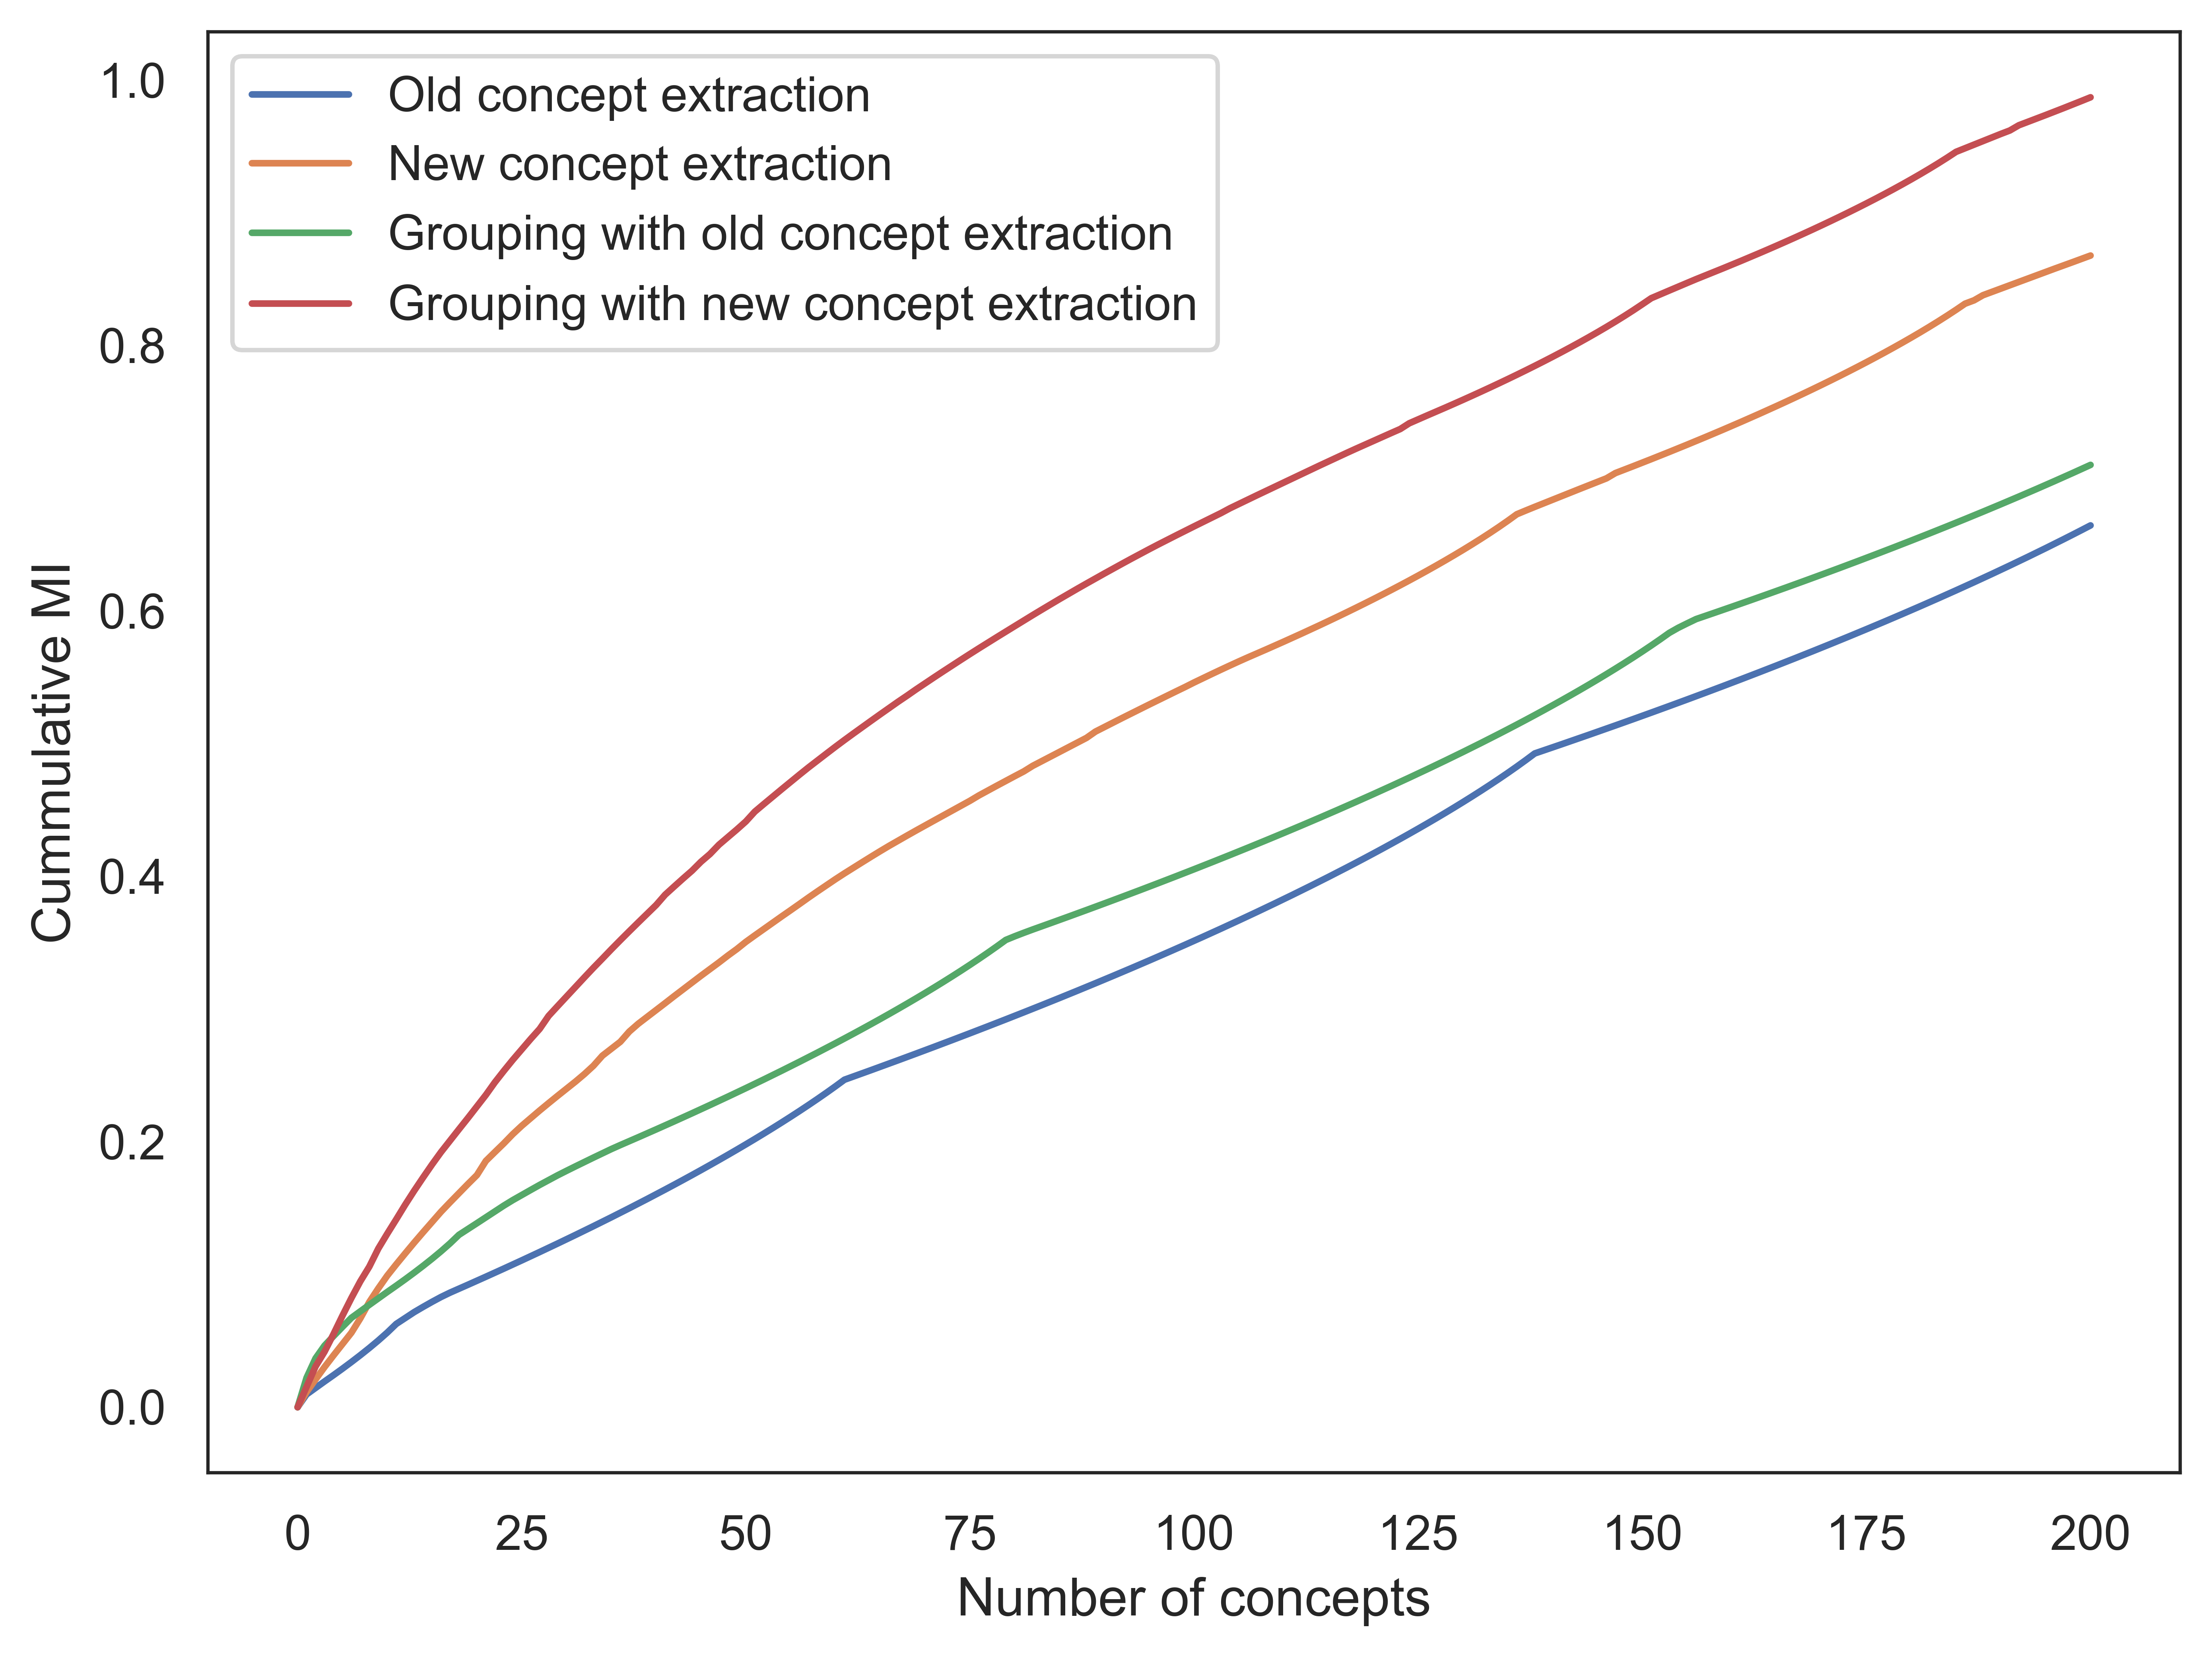

In [139]:
plt.rcParams['figure.dpi'] = 800
plt.rcParams["axes.grid"] = False
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 0.75
plt.rcParams["axes.facecolor"] = 'white'
plt.figure(figsize=(8, 6))

add_cummulative_mi_plt(old_extraction_cummulative_mi, label='Old concept extraction')
add_cummulative_mi_plt(new_extraction_cummulative_mi, label='New concept extraction')
# This is the same as new concept extraction
# add_cummulative_mi_plt(simple_prune_cummulative_mi, label='Simple pruning')
add_cummulative_mi_plt(old_grouping_cummulative_mi, label='Grouping with old concept extraction')
add_cummulative_mi_plt(new_grouping_cummulative_mi, label='Grouping with new concept extraction')

plt.xlabel("Number of concepts")
plt.ylabel("Cummulative MI")
plt.legend()
plt.show()

# plt.savefig('Cummulative MI graphs.png')

### Plot the MI graph for different size of datasets

In [57]:
datapath = "/Users/Cherry0904/Desktop/subsets_for_modelling/subset_mi_test_250"
concept_maxK = 500 # 50

In [58]:
initial_state_old = capture_all_concepts_full_old(datapath)
pipeline = CodexPipeline(methods=['grouping', 'pruning'], use_old_pipeline=True)
after_grouping_old, _ = pipeline(initial_state_old)

subset_250_balanced.csv, 

/Users/Cherry0904/Desktop/roko-for-charlize/venv/lib/python3.8/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


data.shape = (250, 992)
We have 250 datapoints with 992 independent concepts.
rows_to_remove = []
concepts_to_remove = []
Before removing none label
pam.shape = (250, 992)
len(concepts) = 992
ids.shape = (250,)
labels_as_indices.shape = (250,)
categories = ['amusement' 'anger' 'awe' 'contentment' 'disgust' 'excitement' 'fear'
 'sadness' 'something else']
After removing none label
pam.shape = (250, 992)
len(concepts) = 992
ids.shape = (250,)
labels_as_indices.shape = (250,)
categories = ['amusement' 'anger' 'awe' 'contentment' 'disgust' 'excitement' 'fear'
 'sadness' 'something else']
.....................

In [59]:
# threshold = 0 include all
old_pruning_cummulative_mi_250, _ = calc_cummulative_mi(after_grouping_old.concept_pam,
                                                     label_ids=after_grouping_old.label_indices, threshold=0,
                                                     maxK=concept_maxK)
old_pruning_cummulative_mi_250

.....................

array([0.0659134 , 0.09612263, 0.11801012, 0.139297  , 0.15982069,
       0.17962646, 0.19729661, 0.21452695, 0.22952057, 0.24419142,
       0.25830073, 0.27223595, 0.28596832, 0.29819127, 0.30916024,
       0.31940029, 0.32984768, 0.34013251, 0.35043137, 0.35947271,
       0.36778053, 0.37526742])

In [47]:
datapath = "/Users/Cherry0904/Desktop/subsets_for_modelling/subset_mi_test_500"

initial_state_old = capture_all_concepts_full_old(datapath)
pipeline = CodexPipeline(methods=['grouping', 'pruning'], use_old_pipeline=True)
after_grouping_old, _ = pipeline(initial_state_old)

old_pruning_cummulative_mi_500, _ = calc_cummulative_mi(after_grouping_old.concept_pam,
                                                     label_ids=after_grouping_old.label_indices, threshold=0,
                                                     maxK=concept_maxK)
old_pruning_cummulative_mi_500

subset_500_balanced.csv, 

/Users/Cherry0904/Desktop/roko-for-charlize/venv/lib/python3.8/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


data.shape = (500, 2069)
We have 500 datapoints with 2069 independent concepts.
rows_to_remove = []
concepts_to_remove = []
Before removing none label
pam.shape = (500, 2069)
len(concepts) = 2069
ids.shape = (500,)
labels_as_indices.shape = (500,)
categories = ['amusement' 'anger' 'awe' 'contentment' 'disgust' 'excitement' 'fear'
 'sadness' 'something else']
After removing none label
pam.shape = (500, 2069)
len(concepts) = 2069
ids.shape = (500,)
labels_as_indices.shape = (500,)
categories = ['amusement' 'anger' 'awe' 'contentment' 'disgust' 'excitement' 'fear'
 'sadness' 'something else']
..........................................................................................................................

array([0.0694189 , 0.11072436, 0.13199499, 0.15079139, 0.16882154,
       0.18663445, 0.2021854 , 0.21700252, 0.23420901, 0.24852837,
       0.26114907, 0.27250393, 0.28343233, 0.29426208, 0.30445464,
       0.31456602, 0.32413838, 0.33391328, 0.34232211, 0.35087767,
       0.35877958, 0.36661594, 0.37425173, 0.38200687, 0.3898857 ,
       0.3978928 , 0.40463435, 0.41146926, 0.4181601 , 0.42453351,
       0.43086532, 0.4368006 , 0.44259285, 0.44973573, 0.45536181,
       0.46085388, 0.46615469, 0.47119307, 0.4760737 , 0.48101332,
       0.48530323, 0.48964313, 0.49508685, 0.49948842, 0.50394312,
       0.50818079, 0.51239483, 0.51665077, 0.52088446, 0.52424113,
       0.52762326, 0.53096528, 0.5343389 , 0.53711148, 0.53984615,
       0.54259818, 0.54536782, 0.54815533, 0.55036457, 0.55141107,
       0.55141107, 0.55141107])

In [62]:
datapath = "/Users/Cherry0904/Desktop/subsets_for_modelling/subset_mi_test_1000"

initial_state_old = capture_all_concepts_full_old(datapath)
pipeline = CodexPipeline(methods=['grouping', 'pruning'], use_old_pipeline=True)
after_grouping_old, _ = pipeline(initial_state_old)

old_pruning_cummulative_mi_1000, _ = calc_cummulative_mi(after_grouping_old.concept_pam,
                                                     label_ids=after_grouping_old.label_indices, threshold=0,
                                                     maxK=concept_maxK)
old_pruning_cummulative_mi_1000

subset_1000_balanced.csv, 

/Users/Cherry0904/Desktop/roko-for-charlize/venv/lib/python3.8/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


data.shape = (1000, 4105)
We have 1000 datapoints with 4105 independent concepts.
rows_to_remove = []
concepts_to_remove = []
Before removing none label
pam.shape = (1000, 4105)
len(concepts) = 4105
ids.shape = (1000,)
labels_as_indices.shape = (1000,)
categories = ['amusement' 'anger' 'awe' 'contentment' 'disgust' 'excitement' 'fear'
 'sadness' 'something else']
After removing none label
pam.shape = (1000, 4105)
len(concepts) = 4105
ids.shape = (1000,)
labels_as_indices.shape = (1000,)
categories = ['amusement' 'anger' 'awe' 'contentment' 'disgust' 'excitement' 'fear'
 'sadness' 'something else']
................................................................................................................................................................................................................................................................................................................................................

array([0.06090941, 0.10809149, 0.13124973, 0.14804294, 0.16423138,
       0.1790036 , 0.19175241, 0.20342808, 0.21341   , 0.22303042,
       0.23174476, 0.24194436, 0.25055771, 0.25909628, 0.26750237,
       0.27527474, 0.28299373, 0.29029871, 0.29741926, 0.30454501,
       0.31139317, 0.31809846, 0.32462058, 0.33086647, 0.33705595,
       0.34296603, 0.34850336, 0.35412233, 0.35982688, 0.36523205,
       0.37046599, 0.37546938, 0.38045019, 0.38549222, 0.3904296 ,
       0.39532951, 0.40028845, 0.40518999, 0.41007945, 0.4148884 ,
       0.41966721, 0.42441084, 0.4292095 , 0.43406508, 0.43897958,
       0.44395513, 0.44864658, 0.45319286, 0.45772632, 0.46211154,
       0.46640415, 0.47070654, 0.47498851, 0.47922629, 0.48342123,
       0.4876417 , 0.49190459, 0.49621107, 0.50031002, 0.50421155,
       0.50811143, 0.51200214, 0.51581587, 0.51957076, 0.52324195,
       0.52687136, 0.53053398, 0.53411846, 0.53769505, 0.5412476 ,
       0.54459819, 0.55001489, 0.55358881, 0.55695332, 0.56034

In [66]:
datapath = "/Users/Cherry0904/Desktop/subsets_for_modelling/subset_mi_test_3000"

initial_state_old = capture_all_concepts_full_old(datapath)
pipeline = CodexPipeline(methods=['grouping', 'pruning'], use_old_pipeline=True)
after_grouping_old, _ = pipeline(initial_state_old)

old_pruning_cummulative_mi_3000, _ = calc_cummulative_mi(after_grouping_old.concept_pam,
                                                     label_ids=after_grouping_old.label_indices, threshold=0,
                                                     maxK=concept_maxK)
old_pruning_cummulative_mi_3000

subset_3000_balanced.csv, 

/Users/Cherry0904/Desktop/roko-for-charlize/venv/lib/python3.8/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


data.shape = (3000, 12234)
We have 3000 datapoints with 12234 independent concepts.
rows_to_remove = []
concepts_to_remove = []
Before removing none label
pam.shape = (3000, 12234)
len(concepts) = 12234
ids.shape = (3000,)
labels_as_indices.shape = (3000,)
categories = ['amusement' 'anger' 'awe' 'contentment' 'disgust' 'excitement' 'fear'
 'sadness' 'something else']
After removing none label
pam.shape = (3000, 12234)
len(concepts) = 12234
ids.shape = (3000,)
labels_as_indices.shape = (3000,)
categories = ['amusement' 'anger' 'awe' 'contentment' 'disgust' 'excitement' 'fear'
 'sadness' 'something else']
.....................................................................................................................................................................................................................................................................................................................................................................................................

array([0.08744953, 0.1460989 , 0.16656667, 0.18371544, 0.20039527,
       0.21580934, 0.22948261, 0.24222606, 0.25194963, 0.2613669 ,
       0.27065692, 0.27762115, 0.28433544, 0.29105807, 0.29762602,
       0.30396914, 0.30993321, 0.31629539, 0.32253451, 0.32830258,
       0.33395164, 0.33936024, 0.34463789, 0.34932747, 0.3537822 ,
       0.35819405, 0.36256386, 0.36680262, 0.37090506, 0.37478517,
       0.37859047, 0.38277661, 0.3864254 , 0.39002211, 0.39358948,
       0.39708005, 0.40052491, 0.40391048, 0.40729276, 0.41063609,
       0.41396219, 0.41724182, 0.42050486, 0.42369675, 0.42687164,
       0.43011478, 0.43317722, 0.43622207, 0.43959658, 0.44265249,
       0.44564985, 0.44862349, 0.45156455, 0.45448984, 0.45738894,
       0.46031561, 0.46323576, 0.46614398, 0.46907433, 0.47189895,
       0.47463908, 0.47736641, 0.4800938 , 0.48282059, 0.48551924,
       0.48811682, 0.49061553, 0.49363832, 0.49647605, 0.49916369,
       0.50184465, 0.50432922, 0.50674436, 0.5091483 , 0.51155

In [107]:
datapath = "/Users/Cherry0904/Desktop/subset_mi_test_2500"

initial_state_old = capture_all_concepts_full_old(datapath)
pipeline = CodexPipeline(methods=['grouping', 'pruning'], use_old_pipeline=True)
after_grouping_old, _ = pipeline(initial_state_old)

old_pruning_cummulative_mi_2500, _ = calc_cummulative_mi(after_grouping_old.concept_pam,
                                                     label_ids=after_grouping_old.label_indices, threshold=0,
                                                     maxK=concept_maxK)
old_pruning_cummulative_mi_2500

subset_2500_balanced.csv, 

/Users/Cherry0904/Desktop/roko-for-charlize/venv/lib/python3.8/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


data.shape = (2500, 10338)
We have 2500 datapoints with 10338 independent concepts.
rows_to_remove = []
concepts_to_remove = []
Before removing none label
pam.shape = (2500, 10338)
len(concepts) = 10338
ids.shape = (2500,)
labels_as_indices.shape = (2500,)
categories = ['amusement' 'anger' 'awe' 'contentment' 'disgust' 'excitement' 'fear'
 'sadness' 'something else']
After removing none label
pam.shape = (2500, 10338)
len(concepts) = 10338
ids.shape = (2500,)
labels_as_indices.shape = (2500,)
categories = ['amusement' 'anger' 'awe' 'contentment' 'disgust' 'excitement' 'fear'
 'sadness' 'something else']
.....................................................................................................................................................................................................................................................................................................................................................................................................

array([0.08315791, 0.14142587, 0.16118921, 0.1765273 , 0.19169113,
       0.20490882, 0.21661171, 0.2278091 , 0.23873835, 0.24762837,
       0.25635644, 0.26532777, 0.27331749, 0.28069639, 0.28805402,
       0.29529257, 0.30230987, 0.30892467, 0.31533349, 0.32123039,
       0.32796936, 0.33423808, 0.33994709, 0.34552051, 0.35116552,
       0.3566075 , 0.36188991, 0.36714343, 0.372275  , 0.3774122 ,
       0.38240694, 0.38714858, 0.39242307, 0.39654095, 0.40055871,
       0.40439995, 0.40823994, 0.41199872, 0.41558138, 0.41915153,
       0.42272968, 0.42618531, 0.4296248 , 0.43305636, 0.43651622,
       0.43985599, 0.44318067, 0.44632248, 0.44941609, 0.45265175,
       0.45573391, 0.45876587, 0.46178103, 0.46478994, 0.46777293,
       0.47072601, 0.47365999, 0.47655949, 0.48002925, 0.48312498,
       0.48601427, 0.48889046, 0.49175544, 0.49460795, 0.49743072,
       0.50024483, 0.5030801 , 0.50579911, 0.50848595, 0.51115653,
       0.51383335, 0.51667835, 0.5193058 , 0.52191649, 0.52454

In [72]:
from numpy import loadtxt
old_pruning_cummulative_mi_1500 = loadtxt('/Users/Cherry0904/Desktop/roko-for-charlize/cum_mi_1500.csv', delimiter=',')
old_pruning_cummulative_mi_2000 = loadtxt('/Users/Cherry0904/Desktop/roko-for-charlize/cum_mi_2000.csv', delimiter=',')

In [73]:
old_pruning_cummulative_mi_250 = np.append(old_pruning_cummulative_mi_250, np.repeat(np.nan, concept_maxK-len(old_pruning_cummulative_mi_250)))
old_pruning_cummulative_mi_500 = np.append(old_pruning_cummulative_mi_500, np.repeat(np.nan, concept_maxK-len(old_pruning_cummulative_mi_500)))
old_pruning_cummulative_mi_1000 = np.append(old_pruning_cummulative_mi_1000, np.repeat(np.nan, concept_maxK-len(old_pruning_cummulative_mi_1000)))
old_pruning_cummulative_mi_1500 = np.append(old_pruning_cummulative_mi_1500, np.repeat(np.nan, concept_maxK-len(old_pruning_cummulative_mi_1500)))
old_pruning_cummulative_mi_2000 = np.append(old_pruning_cummulative_mi_2000, np.repeat(np.nan, concept_maxK-len(old_pruning_cummulative_mi_2000)))
old_pruning_cummulative_mi_2500 = np.append(old_pruning_cummulative_mi_2500, np.repeat(np.nan, concept_maxK-len(old_pruning_cummulative_mi_2500)))
old_pruning_cummulative_mi_3000 = np.append(old_pruning_cummulative_mi_3000, np.repeat(np.nan, concept_maxK-len(old_pruning_cummulative_mi_3000)))

In [86]:
old_pruning_cummulative_mi_2500

array([0.08566734, 0.12628603, 0.15771828, 0.17529829, 0.18898923,
       0.20247981, 0.21313526, 0.22314745, 0.23130449, 0.23924824,
       0.24701609, 0.25482311, 0.26228621, 0.26961882, 0.27597067,
       0.28210812, 0.28788348, 0.29337955, 0.29866737, 0.30381592,
       0.30866097, 0.31351101, 0.31812983, 0.3227252 , 0.32726835,
       0.33176581, 0.33618948, 0.34098405, 0.3451002 , 0.3489872 ,
       0.35286104, 0.35663038, 0.3603257 , 0.36400644, 0.36762094,
       0.37117657, 0.37470677, 0.37816935, 0.38161188, 0.38502717,
       0.38839151, 0.39171962, 0.39501492, 0.39830345, 0.40156583,
       0.40479871, 0.40802663, 0.41110898, 0.41416321, 0.41719548,
       0.42012775, 0.42297721, 0.42584762, 0.42868811, 0.43151828,
       0.43434158, 0.43710789, 0.43981681, 0.44245765, 0.44506742,
       0.44763829, 0.4502005 , 0.45274746, 0.45527471, 0.45779174,
       0.46028346, 0.46275834, 0.46521763, 0.46767035, 0.47013181,
       0.47257098, 0.47496834, 0.47732271, 0.4796443 , 0.48201

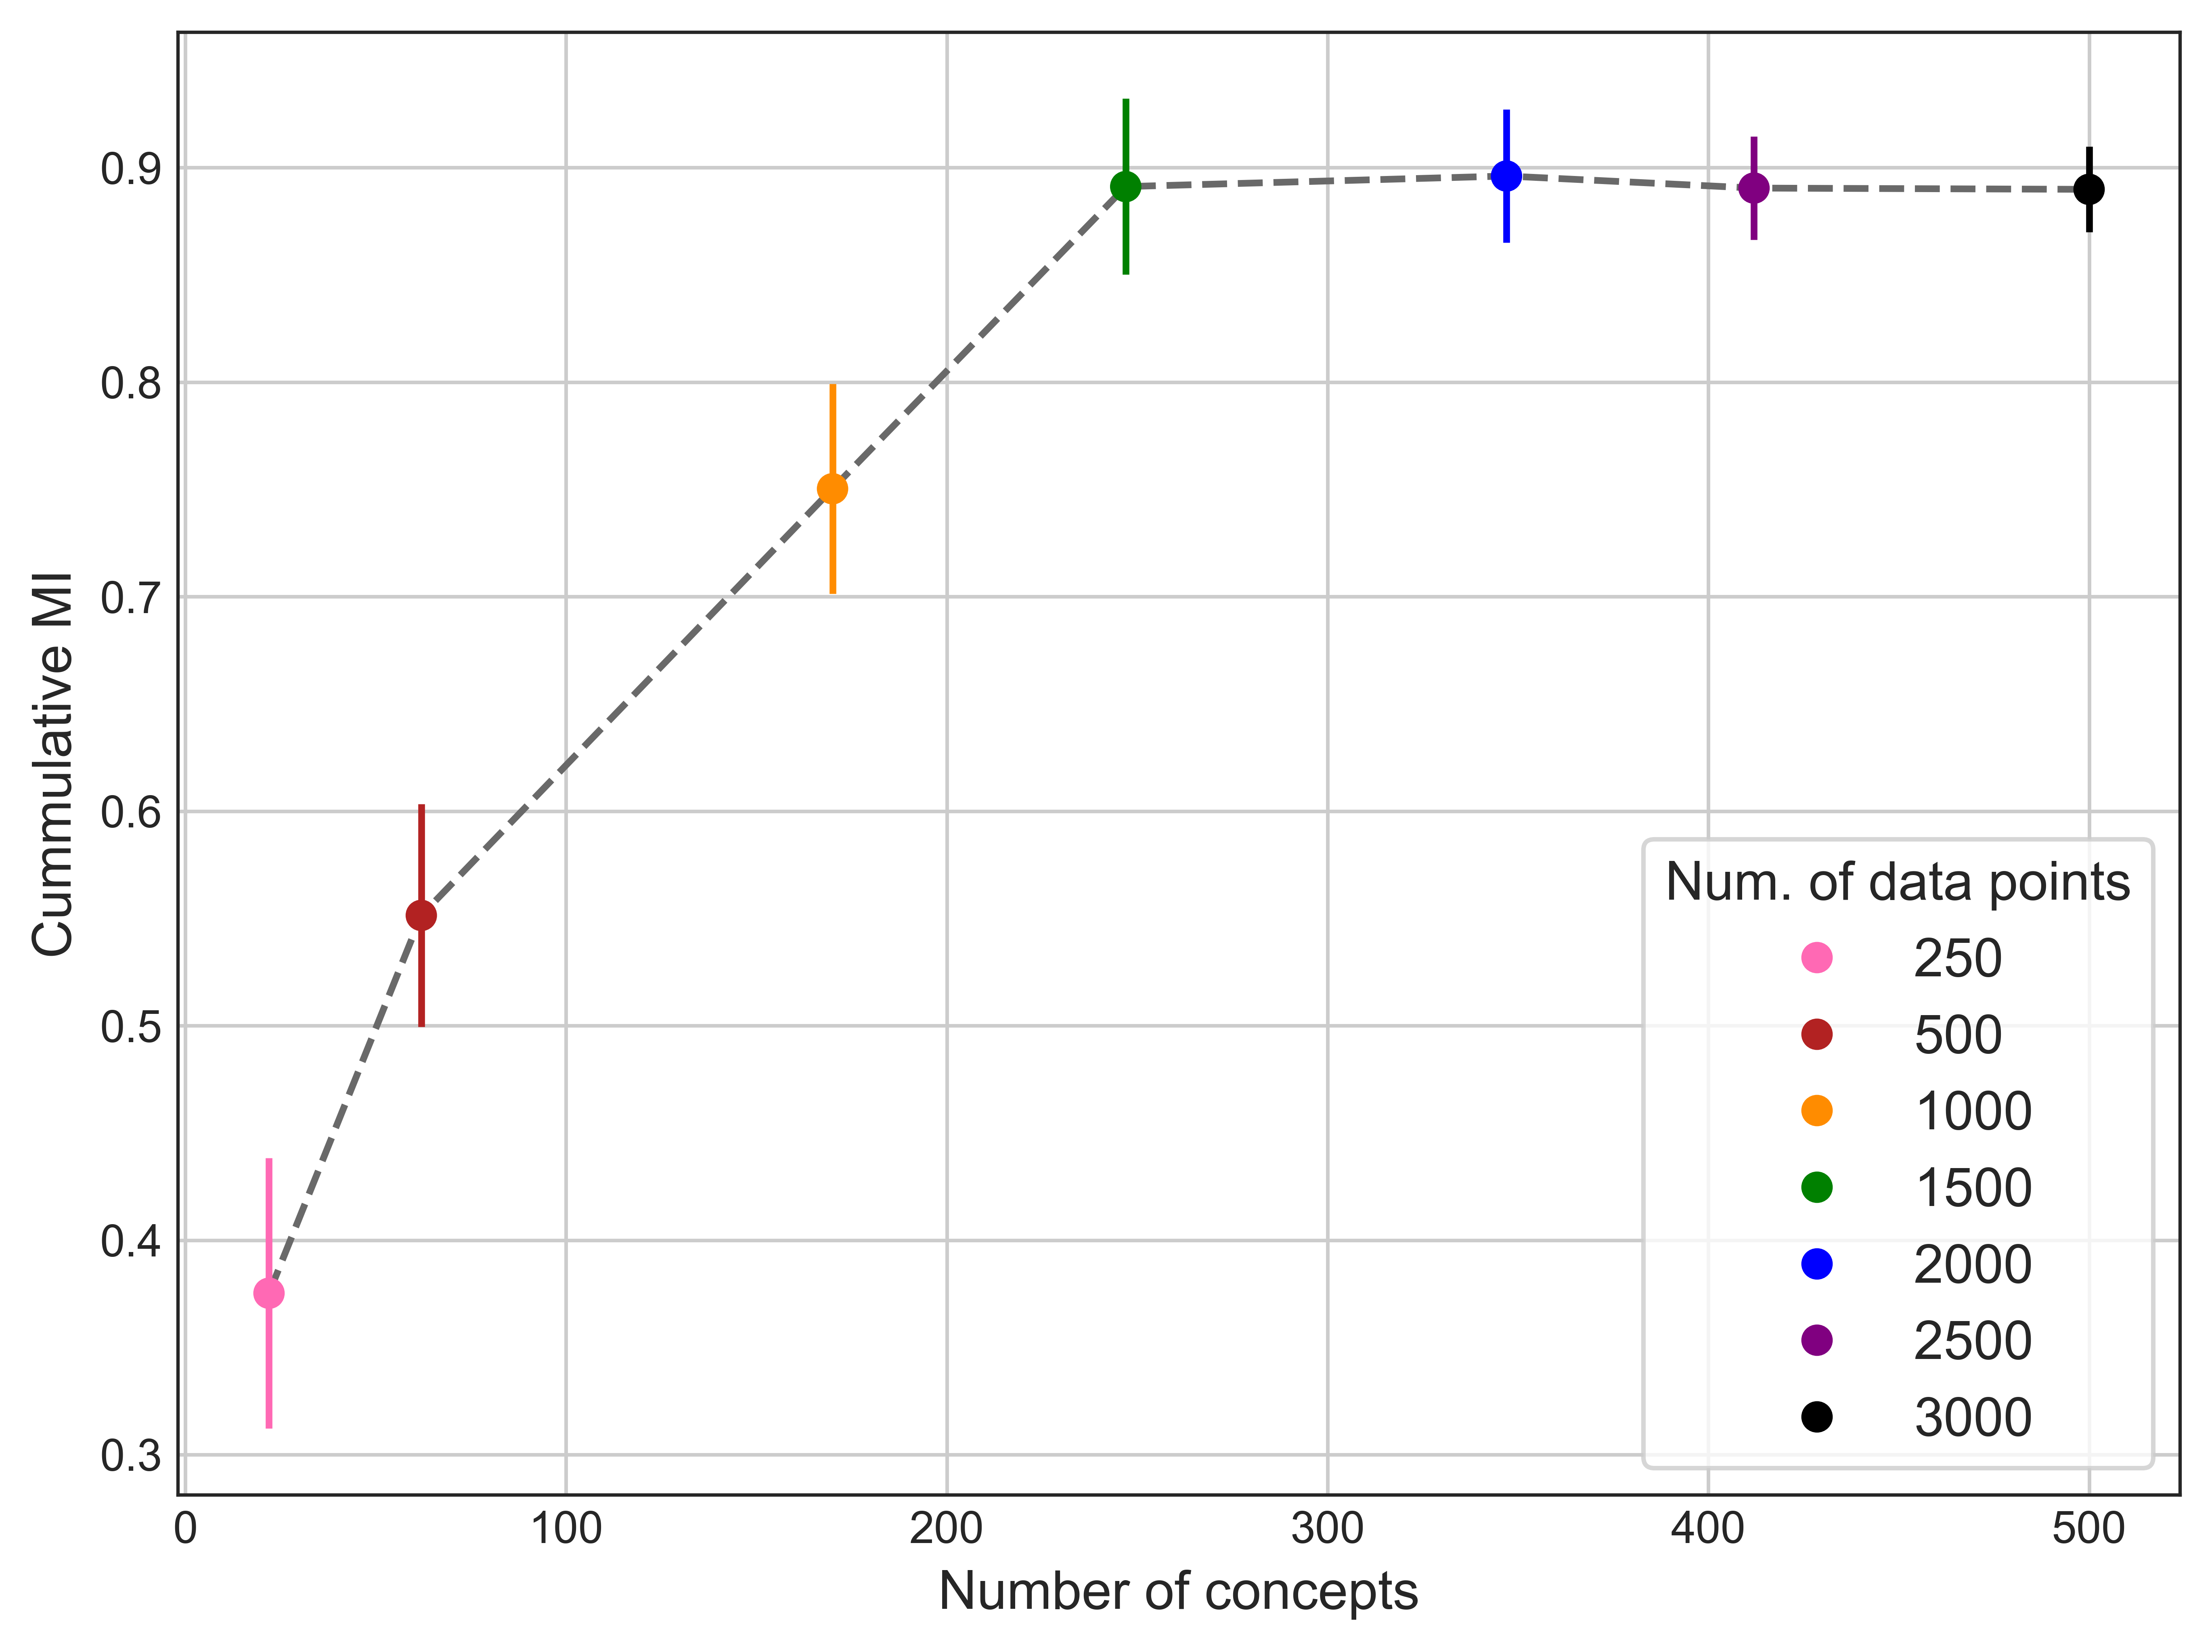

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D  # for legend handle
# plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 800
# plt.rcParams["axes.grid"] = False
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 0.75
plt.rcParams["axes.facecolor"] = 'white'
    

times = [22, 62, 170, 247, 347, 412, 500]
rvs = [0.37526742, 0.55141107, 0.75031614, 0.89118586, 0.89611102, 0.89049441, 0.88989909]
sigma = [0.063, 0.052, 0.049, 0.041, 0.031, 0.024, 0.020]
rv_telescopes = ['250', '500', '1000', '1500', '2000', '2500', '3000']

d = {'rv_times': times, 'rv_rvs': rvs, 'rv_sigma': sigma, 'rv_telescopes': rv_telescopes}
df = pd.DataFrame(data=d)
colors = {'250': 'hotpink', '500': 'firebrick', '1000': 'darkorange', '1500': 'green', '2000': 'blue', '2500': 'purple', '3000': 'black'}

fig, ax = plt.subplots(figsize=(8, 6), edgecolor="black", facecolor="white")
ax.errorbar(df['rv_times'], df['rv_rvs'], df['rv_sigma'], color='None', ecolor=df['rv_telescopes'].map(colors))
ax.scatter(df['rv_times'], df['rv_rvs'], marker='o', color=df['rv_telescopes'].map(colors), zorder=2)
plt.plot(times, rvs, linestyle = "dashed", color = "dimgray", zorder=1)

handles = [Line2D([0], [0], linestyle='', marker='o', color=v, label=k) for k, v in colors.items()]
ax.legend(handles=handles, loc='lower right', ncol=1, fontsize=12, title = 'Num. of data points', title_fontsize=12, frameon=True)
plt.xlabel("Number of concepts", size = 12)
plt.ylabel("Cummulative MI", size = 12)
plt.show()

In [114]:
# Check the shannon entrophy for the entire artemis dataset 
list_of_counts = [72, 223, 52]
list_of_averaged_nums_of_one = [368/72, 745/223, 562/52] # concrete, perceptive, affective
print(list_of_averaged_nums_of_one)
total_count = sum(list_of_averaged_nums_of_one)
shannon_entropy = -(sum([c/total_count * np.log(c/total_count) for c in list_of_averaged_nums_of_one]))/np.log(3)
print(shannon_entropy)
# print(list_of_counts)

[5.111111111111111, 3.3408071748878925, 10.807692307692308]
0.8921541387209789


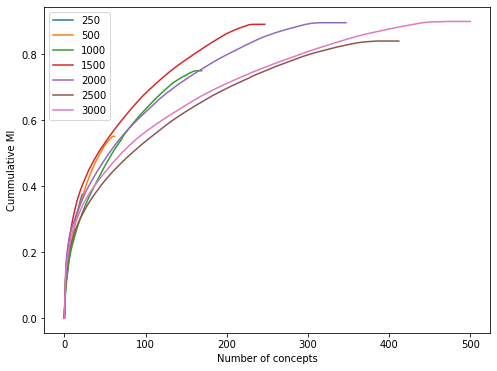

In [75]:
plt.figure(figsize=(8, 6))
add_cummulative_mi_plt(old_pruning_cummulative_mi_250, label='250')
add_cummulative_mi_plt(old_pruning_cummulative_mi_500, label='500')
add_cummulative_mi_plt(old_pruning_cummulative_mi_1000, label='1000')
add_cummulative_mi_plt(old_pruning_cummulative_mi_1500, label='1500')
add_cummulative_mi_plt(old_pruning_cummulative_mi_2000, label='2000')
add_cummulative_mi_plt(old_pruning_cummulative_mi_2500, label='2500')
add_cummulative_mi_plt(old_pruning_cummulative_mi_3000, label='3000')

plt.xlabel("Number of concepts")
plt.ylabel("Cummulative MI")
plt.legend()
plt.show()

# plt.savefig('Cummulative MI graphs.png')